Ques:1 1. Create a file “people.txt” with the following data:
            Age agegroup height status yearsmarried
            21 adult 6.0 single -1
            2 child 3 married 0
            18 adult 5.7 married 20
            221 elderly 5 widowed 2
            34 child -7 married 3
i) Read the data from the file “people.txt”.
ii) Create a ruleset E that contain rules to check for the following conditions:
        1. The age should be in the range 0-150.
        2. The age should be greater than yearsmarried.
        3. The status should be married or single or widowed.
        4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup 
           should be adult, if age is more than 65 the agegroup should be elderly.
iii) Check whether ruleset E is violated by the data in the file people.txt.
iv) Summarize the results obtained in part (iii)
v) Visualize the results obtained in part (iii)

In [11]:
import pandas as pd
d1=pd.read_table(r"C:\Users\CSLab\Documents\YashVishnoi DM\people.txt")
d1

Age agegroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child    -7.0  married             3

In [12]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5 non-null      int64  
 1   agegroup      5 non-null      object 
 2   height        5 non-null      float64
 3   status        5 non-null      object 
 4   yearsmarried  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [13]:
d1.shape

(5, 5)

In [14]:
d1.describe()

Age   height  yearsmarried
count    5.000000  5.00000      5.000000
mean    59.200000  2.54000      4.800000
std     91.163041  5.45967      8.642916
min      2.000000 -7.00000     -1.000000
25%     18.000000  3.00000      0.000000
50%     21.000000  5.00000      2.000000
75%     34.000000  5.70000      3.000000
max    221.000000  6.00000     20.000000

In [16]:
d1.isna().sum()

Age             0
agegroup        0
height          0
status          0
yearsmarried    0
dtype: int64

In [4]:
Rule1 = d1["Age"].apply(lambda x: True if x>0 and x<150 else False)
Rule1     

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool

In [7]:
Rule2 =d1.apply(lambda x: True if x.Age>x.yearsmarried else False ,axis=1)
Rule2

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [9]:
Rule3 =d1["status"].apply(lambda x: True if x=="single" or x=="married" or x=="widowed" else False)
Rule3

0    True
1    True
2    True
3    True
4    True
Name: status, dtype: bool

In [40]:
Rule4 =d1.apply(lambda x: True if (x.Age<18 and x.agegroup=="child") or (18<=x.Age<65 and x.agegroup=="adult") or (x.Age>=65 and x.agegroup=="elderly") else False , axis=1)
Rule4

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [41]:
Rules =pd.DataFrame({"Rule1" : Rule1,"Rule2" : Rule2, "Rule3" : Rule3,"Rule4" : Rule4})
Rules

Rule1  Rule2  Rule3  Rule4
0   True   True   True   True
1   True   True   True   True
2   True  False   True   True
3  False   True   True   True
4   True   True   True  False

In [44]:
rule=Rules.astype(int)
rule.describe()

Rule1     Rule2  Rule3     Rule4
count  5.000000  5.000000    5.0  5.000000
mean   0.800000  0.800000    1.0  0.800000
std    0.447214  0.447214    0.0  0.447214
min    0.000000  0.000000    1.0  0.000000
25%    1.000000  1.000000    1.0  1.000000
50%    1.000000  1.000000    1.0  1.000000
75%    1.000000  1.000000    1.0  1.000000
max    1.000000  1.000000    1.0  1.000000

In [26]:
print("Rules violation in Rule1")
len(Rules)-Rules["Rule1"].sum()

Rules violation in Rule1


1

In [27]:
print("Rules violation in Rule2")
len(Rules)-Rules["Rule2"].sum()

Rules violation in Rule2


1

In [28]:
print("Rules violation in Rule3")
len(Rules)-Rules["Rule3"].sum()

Rules violation in Rule3


0

In [29]:
print("Rules violation in Rule4")
len(Rules)-Rules["Rule4"].sum()

Rules violation in Rule4


1

In [30]:
import matplotlib.pyplot as plt

In [36]:
Rules.describe()

Rule1 Rule2 Rule3 Rule4
count      5     5     5     5
unique     2     2     1     2
top     True  True  True  True
freq       4     4     5     4

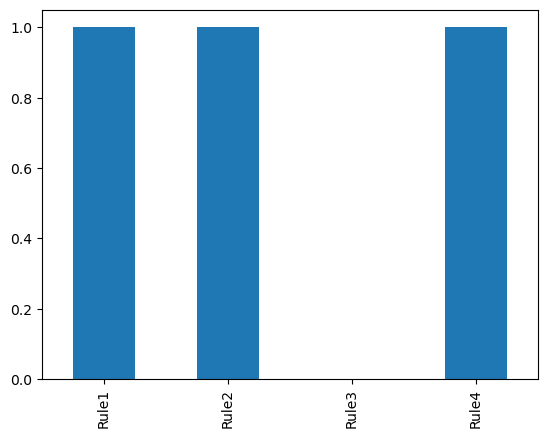

In [37]:
plt.figure()
Rules.apply(lambda x: len(x)-x.sum()).plot(kind='bar')
plt.xlabel="Rules"
plt.ylabel="No. of records which violates the rules"
